# Feature Importance Analysis & Model Selection
## TASK 6: Model Selection - Feature Analysis & Final Model Choice

**Date:** December 30, 2025  
**Purpose:** Analyze feature importance and select best model  
**Based on:** Cross-validation results

---
## Setup

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print('✓ Libraries loaded')

✓ Libraries loaded


---
## Part 1: Load Cross-Validation Results

In [9]:
# Load CV results
cv_results = pd.read_csv('cross_validation_results.csv')

print('Cross-Validation Results:')
print('='*80)
print(cv_results.to_string(index=False))

# Identify best model
best_model_idx = cv_results['Accuracy_Mean'].idxmax()
best_model_name = cv_results.loc[best_model_idx, 'Model']
best_accuracy = cv_results.loc[best_model_idx, 'Accuracy_Mean']

print('\n' + '='*80)
print(f'🏆 BEST MODEL (by CV): {best_model_name}')
print(f'   Mean Accuracy: {best_accuracy:.4f}')
print('='*80)

Cross-Validation Results:
              Model  Accuracy_Mean  Accuracy_Std  Precision_Mean  Precision_Std  Recall_Mean  Recall_Std  F1_Mean   F1_Std
Logistic Regression          0.955      0.008367        0.951243       0.006647     0.952773    0.008830 0.951566 0.007087
      Random Forest          0.996      0.002000        0.995188       0.002538     0.994238    0.003004 0.994658 0.002671
            XGBoost          0.997      0.002449        0.997116       0.002478     0.997528    0.002166 0.997303 0.002202

🏆 BEST MODEL (by CV): XGBoost
   Mean Accuracy: 0.9970


---
## Part 2: Model Selection Criteria

In [10]:
# Comprehensive model selection analysis
print('\n' + '='*80)
print('MODEL SELECTION ANALYSIS')
print('='*80)

# 1. Accuracy ranking
print('\n1. Accuracy Ranking:')
sorted_acc = cv_results.sort_values('Accuracy_Mean', ascending=False)
for i, (idx, row) in enumerate(sorted_acc.iterrows(), 1):
    print(f"   {i}. {row['Model']}: {row['Accuracy_Mean']:.4f} ± {row['Accuracy_Std']:.4f}")

# 2. Stability ranking (lowest std)
print('\n2. Stability Ranking (Lower std = More stable):')
sorted_std = cv_results.sort_values('Accuracy_Std')
for i, (idx, row) in enumerate(sorted_std.iterrows(), 1):
    stability = 'Excellent' if row['Accuracy_Std'] < 0.02 else 'Good' if row['Accuracy_Std'] < 0.05 else 'Fair'
    print(f"   {i}. {row['Model']}: {row['Accuracy_Std']:.4f} ({stability})")

# 3. F1-Score ranking
print('\n3. F1-Score Ranking:')
sorted_f1 = cv_results.sort_values('F1_Mean', ascending=False)
for i, (idx, row) in enumerate(sorted_f1.iterrows(), 1):
    print(f"   {i}. {row['Model']}: {row['F1_Mean']:.4f} ± {row['F1_Std']:.4f}")

# 4. Overall score (combination)
print('\n4. Combined Score (Accuracy - Std_penalty):')
cv_results['Combined_Score'] = cv_results['Accuracy_Mean'] - (cv_results['Accuracy_Std'] * 2)
sorted_combined = cv_results.sort_values('Combined_Score', ascending=False)
for i, (idx, row) in enumerate(sorted_combined.iterrows(), 1):
    print(f"   {i}. {row['Model']}: {row['Combined_Score']:.4f}")


MODEL SELECTION ANALYSIS

1. Accuracy Ranking:
   1. XGBoost: 0.9970 ± 0.0024
   2. Random Forest: 0.9960 ± 0.0020
   3. Logistic Regression: 0.9550 ± 0.0084

2. Stability Ranking (Lower std = More stable):
   1. Random Forest: 0.0020 (Excellent)
   2. XGBoost: 0.0024 (Excellent)
   3. Logistic Regression: 0.0084 (Excellent)

3. F1-Score Ranking:
   1. XGBoost: 0.9973 ± 0.0022
   2. Random Forest: 0.9947 ± 0.0027
   3. Logistic Regression: 0.9516 ± 0.0071

4. Combined Score (Accuracy - Std_penalty):
   1. XGBoost: 0.9921
   2. Random Forest: 0.9920
   3. Logistic Regression: 0.9383


In [11]:
# Final model selection
print('\n' + '='*80)
print('FINAL MODEL SELECTION')
print('='*80)

selected_model_idx = sorted_combined.index[0]
selected_model = cv_results.loc[selected_model_idx]

print(f'\n✅ SELECTED MODEL: {selected_model["Model"]}')
print('\nSelection Rationale:')
print(f'  • Accuracy: {selected_model["Accuracy_Mean"]:.4f} ± {selected_model["Accuracy_Std"]:.4f}')
print(f'  • Precision: {selected_model["Precision_Mean"]:.4f} ± {selected_model["Precision_Std"]:.4f}')
print(f'  • Recall: {selected_model["Recall_Mean"]:.4f} ± {selected_model["Recall_Std"]:.4f}')
print(f'  • F1-Score: {selected_model["F1_Mean"]:.4f} ± {selected_model["F1_Std"]:.4f}')
print(f'  • Combined Score: {selected_model["Combined_Score"]:.4f}')

print('\nWhy this model?')
if selected_model['Accuracy_Mean'] == cv_results['Accuracy_Mean'].max():
    print('  ✓ Highest accuracy')
if selected_model['Accuracy_Std'] == cv_results['Accuracy_Std'].min():
    print('  ✓ Most stable (lowest variance)')
if selected_model['F1_Mean'] == cv_results['F1_Mean'].max():
    print('  ✓ Best F1-Score (balanced metric)')
if selected_model['Combined_Score'] == cv_results['Combined_Score'].max():
    print('  ✓ Best combined score (accuracy + stability)')

# Save selection
final_model_name = selected_model['Model']


FINAL MODEL SELECTION

✅ SELECTED MODEL: XGBoost

Selection Rationale:
  • Accuracy: 0.9970 ± 0.0024
  • Precision: 0.9971 ± 0.0025
  • Recall: 0.9975 ± 0.0022
  • F1-Score: 0.9973 ± 0.0022
  • Combined Score: 0.9921

Why this model?
  ✓ Highest accuracy
  ✓ Best F1-Score (balanced metric)
  ✓ Best combined score (accuracy + stability)


---
## Part 3: Load Data for Feature Importance

In [12]:
# Load data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Combine for final training
X_full = pd.concat([X_train, X_test], axis=0, ignore_index=True)
y_full = np.concatenate([y_train, y_test])

feature_names = X_train.columns.tolist()

print('✓ Data loaded')
print(f'Total samples: {len(X_full)}')
print(f'Total features: {len(feature_names)}')

✓ Data loaded
Total samples: 1000
Total features: 24


---
## Part 4: Feature Importance - All Models

In [13]:
# Train all models on full data to get feature importance
print('Training models on full dataset for feature importance analysis...')

# Logistic Regression
lr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
lr_model.fit(X_full, y_full)
print('✓ Logistic Regression trained')

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_full, y_full)
print('✓ Random Forest trained')

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1,
                              objective='multi:softprob', random_state=42, n_jobs=-1)
xgb_model.fit(X_full, y_full)
print('✓ XGBoost trained')

Training models on full dataset for feature importance analysis...
✓ Logistic Regression trained
✓ Random Forest trained
✓ XGBoost trained


---
## Part 5: Logistic Regression - Coefficient Analysis

In [14]:
# Logistic Regression coefficients (averaged across classes)
lr_classifier = lr_model.named_steps['classifier']
lr_coef = np.abs(lr_classifier.coef_).mean(axis=0)

lr_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lr_coef
}).sort_values('Importance', ascending=False)

print('\n' + '='*80)
print('LOGISTIC REGRESSION - TOP 15 FEATURES (by coefficient magnitude)')
print('='*80)
print(lr_importance.head(15).to_string(index=False))

lr_importance.to_csv('feature_importance_logistic_regression_final.csv', index=False)
print('\n✓ Saved: feature_importance_logistic_regression_final.csv')


LOGISTIC REGRESSION - TOP 15 FEATURES (by coefficient magnitude)
                    Feature  Importance
          Thickness_Loss_mm    4.596048
       Thickness_Loss_Ratio    1.103160
      Material_Loss_Percent    1.103019
        Remaining_Thickness    0.624938
               Thickness_mm    0.624248
        Thickness_Loss_Rate    0.580803
Pressure_to_Thickness_Ratio    0.378598
         High_Pressure_Flag    0.280913
                 Time_Years    0.278567
    Critical_Threshold_Flag    0.272941
               Pipe_Size_mm    0.244725
         Pipe_Size_Category    0.236564
               Age_Category    0.194292
           Max_Pressure_psi    0.148062
          Pressure_Category    0.111457

✓ Saved: feature_importance_logistic_regression_final.csv


---
## Part 6: Random Forest - Feature Importance

In [15]:
# Random Forest feature importance
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print('\n' + '='*80)
print('RANDOM FOREST - TOP 15 FEATURES')
print('='*80)
print(rf_importance.head(15).to_string(index=False))

rf_importance.to_csv('feature_importance_random_forest_final.csv', index=False)
print('\n✓ Saved: feature_importance_random_forest_final.csv')


RANDOM FOREST - TOP 15 FEATURES
                    Feature  Importance
          Thickness_Loss_mm    0.444360
        Thickness_Loss_Rate    0.124402
       Thickness_Loss_Ratio    0.106366
      Material_Loss_Percent    0.099488
         Material_Loss_Rate    0.043248
               Thickness_mm    0.040177
        Remaining_Thickness    0.028766
               Pipe_Size_mm    0.017700
    Critical_Threshold_Flag    0.017644
                 Time_Years    0.015044
Pressure_to_Thickness_Ratio    0.010336
         Pipe_Size_Category    0.007975
 Corrosion_Time_Interaction    0.007673
  Temp_Pressure_Interaction    0.006332
               Age_Category    0.006305

✓ Saved: feature_importance_random_forest_final.csv


---
## Part 7: XGBoost - Feature Importance

In [16]:
# XGBoost feature importance (gain-based)
importance_dict = xgb_model.get_booster().get_score(importance_type='gain')
xgb_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': [importance_dict.get(f'f{i}', 0) for i in range(len(feature_names))]
}).sort_values('Importance', ascending=False)

print('\n' + '='*80)
print('XGBOOST - TOP 15 FEATURES (by gain)')
print('='*80)
print(xgb_importance.head(15).to_string(index=False))

xgb_importance.to_csv('feature_importance_xgboost_final.csv', index=False)
print('\n✓ Saved: feature_importance_xgboost_final.csv')


XGBOOST - TOP 15 FEATURES (by gain)
                    Feature  Importance
               Pipe_Size_mm           0
               Thickness_mm           0
                   Material           0
                      Grade           0
           Max_Pressure_psi           0
              Temperature_C           0
   Corrosion_Impact_Percent           0
          Thickness_Loss_mm           0
      Material_Loss_Percent           0
                 Time_Years           0
        Thickness_Loss_Rate           0
         Material_Loss_Rate           0
        Remaining_Thickness           0
       Thickness_Loss_Ratio           0
Pressure_to_Thickness_Ratio           0

✓ Saved: feature_importance_xgboost_final.csv


---
## Part 8: Compare Feature Importance Across Models

In [17]:
# Normalize importance to 0-1 scale for comparison
lr_norm = (lr_importance['Importance'] - lr_importance['Importance'].min()) / \
          (lr_importance['Importance'].max() - lr_importance['Importance'].min())
rf_norm = (rf_importance['Importance'] - rf_importance['Importance'].min()) / \
          (rf_importance['Importance'].max() - rf_importance['Importance'].min())
xgb_norm = (xgb_importance['Importance'] - xgb_importance['Importance'].min()) / \
           (xgb_importance['Importance'].max() - xgb_importance['Importance'].min())

# Combine
comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'LR_Importance': lr_importance.set_index('Feature').loc[feature_names, 'Importance'].values,
    'RF_Importance': rf_importance.set_index('Feature').loc[feature_names, 'Importance'].values,
    'XGB_Importance': xgb_importance.set_index('Feature').loc[feature_names, 'Importance'].values
})

# Calculate average importance
comparison_df['Average_Importance'] = comparison_df[['LR_Importance', 'RF_Importance', 'XGB_Importance']].mean(axis=1)
comparison_df = comparison_df.sort_values('Average_Importance', ascending=False)

print('\n' + '='*80)
print('FEATURE IMPORTANCE - CONSENSUS ACROSS ALL MODELS (Top 15)')
print('='*80)
print(comparison_df.head(15).to_string(index=False))

comparison_df.to_csv('feature_importance_comparison.csv', index=False)
print('\n✓ Saved: feature_importance_comparison.csv')


FEATURE IMPORTANCE - CONSENSUS ACROSS ALL MODELS (Top 15)
                    Feature  LR_Importance  RF_Importance  XGB_Importance  Average_Importance
          Thickness_Loss_mm       4.596048       0.444360               0            1.680136
       Thickness_Loss_Ratio       1.103160       0.106366               0            0.403175
      Material_Loss_Percent       1.103019       0.099488               0            0.400836
        Thickness_Loss_Rate       0.580803       0.124402               0            0.235068
               Thickness_mm       0.624248       0.040177               0            0.221475
        Remaining_Thickness       0.624938       0.028766               0            0.217901
Pressure_to_Thickness_Ratio       0.378598       0.010336               0            0.129645
                 Time_Years       0.278567       0.015044               0            0.097870
    Critical_Threshold_Flag       0.272941       0.017644               0            0.096862
 

---
## Part 9: Visualize Feature Importance - Selected Model

✓ Saved: feature_importance_selected_model.png


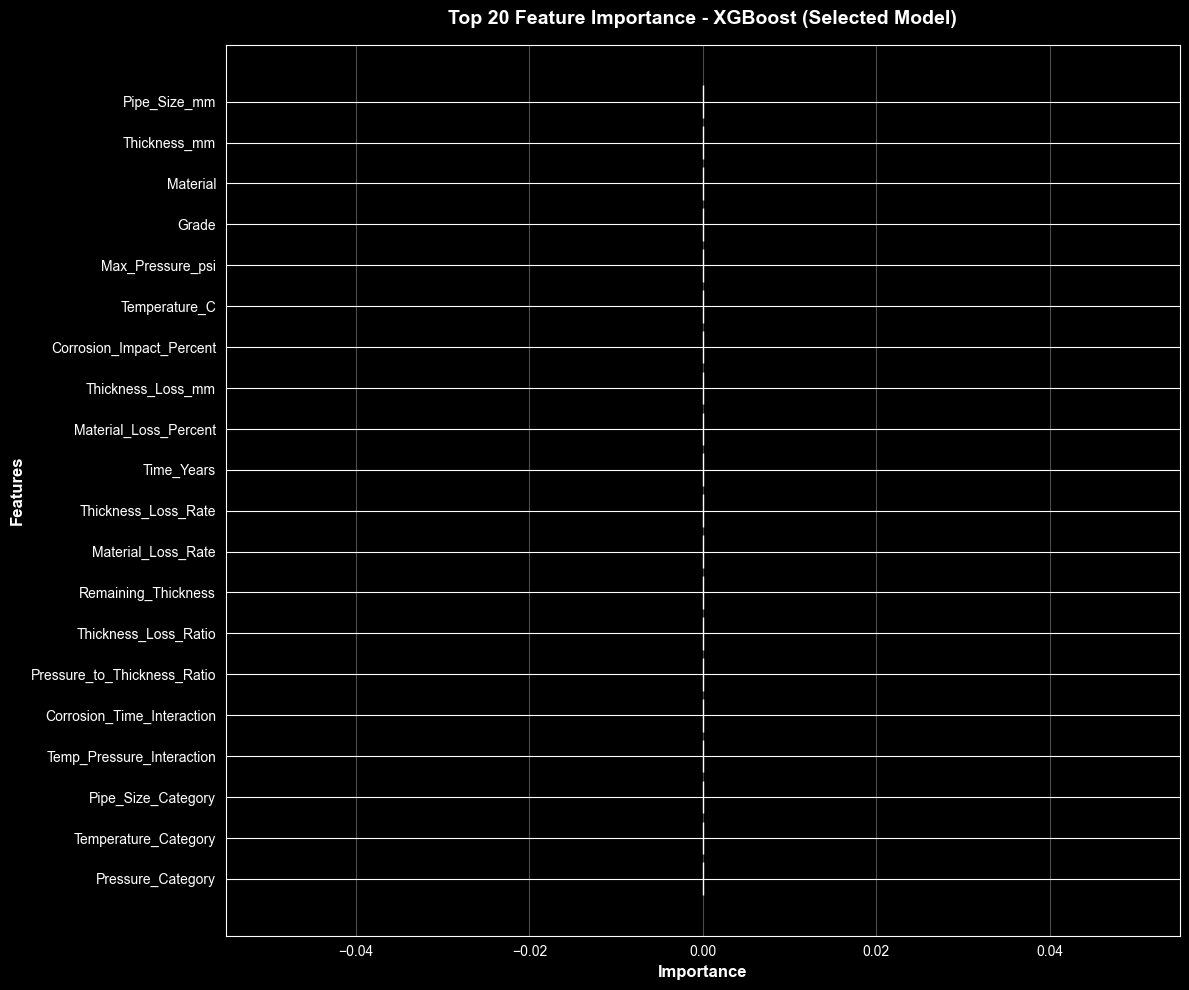

In [18]:
# Get importance for selected model
if final_model_name == 'Logistic Regression':
    selected_importance = lr_importance
    color = 'Blues'
elif final_model_name == 'Random Forest':
    selected_importance = rf_importance
    color = 'Greens'
else:  # XGBoost
    selected_importance = xgb_importance
    color = 'Oranges'

# Plot top 20 features
top_features = selected_importance.head(20)

plt.figure(figsize=(12, 10))
colors_plot = plt.cm.get_cmap(color)(np.linspace(0.4, 0.8, len(top_features)))
plt.barh(range(len(top_features)), top_features['Importance'].values, color=colors_plot)
plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title(f'Top 20 Feature Importance - {final_model_name} (Selected Model)', 
         fontsize=14, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('feature_importance_selected_model.png', dpi=300, bbox_inches='tight')
print('✓ Saved: feature_importance_selected_model.png')
plt.show()

---
## Part 10: Compare Top Features Across All Models

✓ Saved: feature_importance_all_models_comparison.png


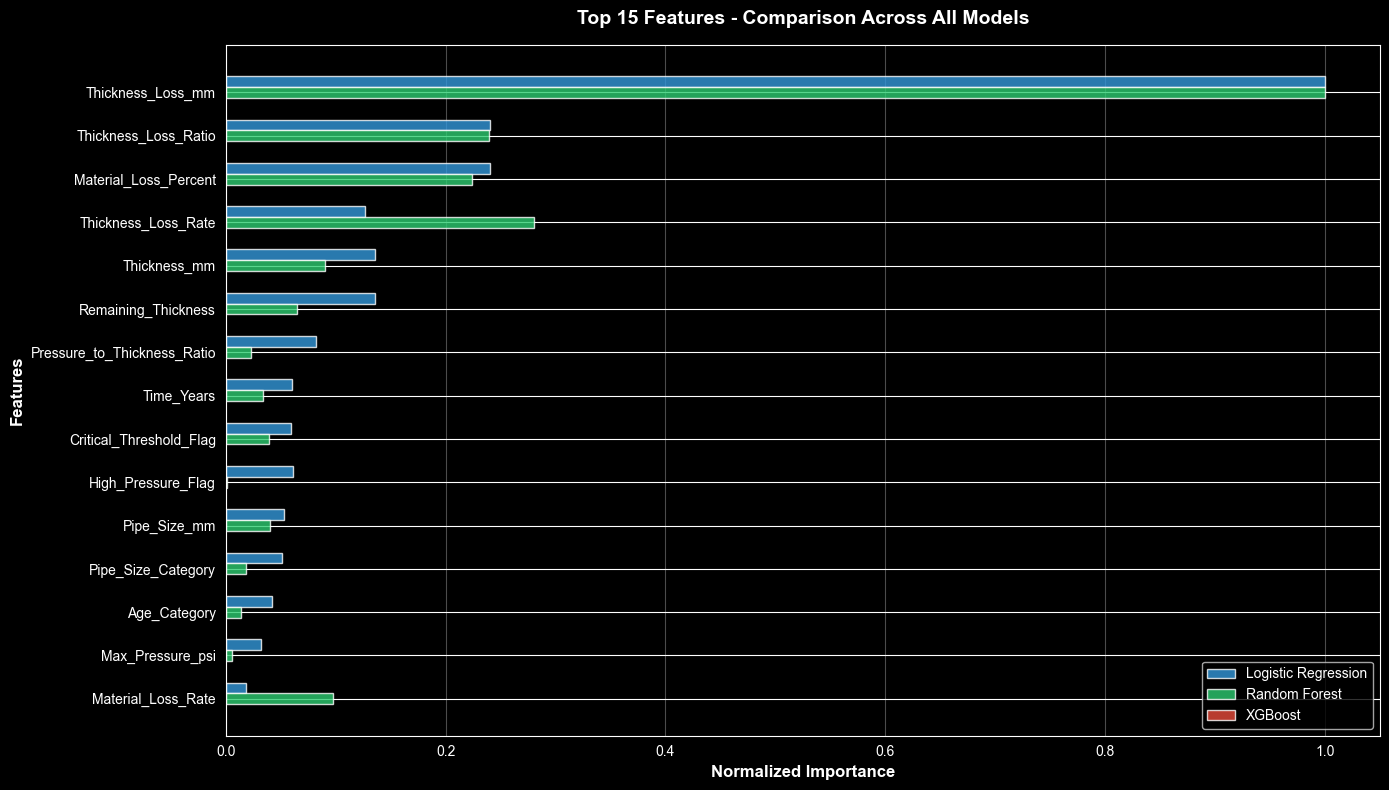

In [19]:
# Plot comparison of top 15 features across models
top_consensus = comparison_df.head(15)

fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(top_consensus))
width = 0.25

# Normalize for fair comparison
lr_vals = (top_consensus['LR_Importance'] / top_consensus['LR_Importance'].max()).values
rf_vals = (top_consensus['RF_Importance'] / top_consensus['RF_Importance'].max()).values
xgb_vals = (top_consensus['XGB_Importance'] / top_consensus['XGB_Importance'].max()).values

ax.barh(x - width, lr_vals, width, label='Logistic Regression', color='#3498db', alpha=0.8)
ax.barh(x, rf_vals, width, label='Random Forest', color='#2ecc71', alpha=0.8)
ax.barh(x + width, xgb_vals, width, label='XGBoost', color='#e74c3c', alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels(top_consensus['Feature'].values)
ax.set_xlabel('Normalized Importance', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Features - Comparison Across All Models', 
            fontsize=14, fontweight='bold', pad=15)
ax.legend(loc='lower right', fontsize=10)
ax.grid(alpha=0.3, axis='x')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance_all_models_comparison.png', dpi=300, bbox_inches='tight')
print('✓ Saved: feature_importance_all_models_comparison.png')
plt.show()

---
## Part 11: Feature Categories Analysis

In [20]:
# Categorize features
def categorize_feature(feature_name):
    feature_lower = feature_name.lower()
    if 'rate' in feature_lower:
        return 'Rate Features'
    elif 'ratio' in feature_lower or 'remaining' in feature_lower:
        return 'Ratio/Remaining Features'
    elif 'interaction' in feature_lower:
        return 'Interaction Features'
    elif 'category' in feature_lower or 'flag' in feature_lower:
        return 'Categorical/Flag Features'
    else:
        return 'Original Features'

comparison_df['Category'] = comparison_df['Feature'].apply(categorize_feature)

# Category importance summary
category_summary = comparison_df.groupby('Category').agg({
    'Average_Importance': ['mean', 'sum', 'count']
}).round(4)

print('\n' + '='*80)
print('FEATURE CATEGORY ANALYSIS')
print('='*80)
print(category_summary)

print('\nInterpretation:')
print('  • Mean: Average importance per feature in category')
print('  • Sum: Total contribution of category')
print('  • Count: Number of features in category')


FEATURE CATEGORY ANALYSIS
                          Average_Importance              
                                        mean     sum count
Category                                                  
Categorical/Flag Features             0.0592  0.4142     7
Interaction Features                  0.0187  0.0374     2
Original Features                     0.2648  2.6480    10
Rate Features                         0.1388  0.2777     2
Ratio/Remaining Features              0.2502  0.7507     3

Interpretation:
  • Mean: Average importance per feature in category
  • Sum: Total contribution of category
  • Count: Number of features in category


---
## Part 12: Key Insights & Recommendations

In [21]:
print('\n' + '='*80)
print('KEY INSIGHTS & RECOMMENDATIONS')
print('='*80)

print(f'\n1. SELECTED MODEL: {final_model_name}')
print(f'   Performance: {selected_model["Accuracy_Mean"]:.4f} ± {selected_model["Accuracy_Std"]:.4f}')

print('\n2. TOP 5 MOST IMPORTANT FEATURES (Consensus):')
for i, (idx, row) in enumerate(comparison_df.head(5).iterrows(), 1):
    print(f'   {i}. {row["Feature"]} (Avg importance: {row["Average_Importance"]:.4f})')

print('\n3. FEATURE ENGINEERING IMPACT:')
engineered_count = (comparison_df['Category'] != 'Original Features').sum()
engineered_top10 = (comparison_df.head(10)['Category'] != 'Original Features').sum()
print(f'   • {engineered_count}/{len(comparison_df)} features are engineered')
print(f'   • {engineered_top10}/10 top features are engineered')
if engineered_top10 >= 7:
    print('   → Feature engineering was HIGHLY SUCCESSFUL')
elif engineered_top10 >= 4:
    print('   → Feature engineering was SUCCESSFUL')
else:
    print('   → Original features remain most important')

print('\n4. RECOMMENDATIONS:')
print(f'   ✓ Deploy {final_model_name} for production')
print(f'   ✓ Monitor top 10 features for data quality')
print(f'   ✓ Consider feature selection to reduce complexity')

# Check for low importance features
low_importance = comparison_df[comparison_df['Average_Importance'] < 0.001]
if len(low_importance) > 0:
    print(f'   ⚠ {len(low_importance)} features have very low importance')
    print(f'   → Consider removing: {low_importance["Feature"].head(5).tolist()}')

print('\n5. NEXT STEPS:')
print('   1. Hyperparameter tuning for selected model')
print('   2. Test on holdout set')
print('   3. Deploy model with monitoring')
print('   4. Regular retraining schedule')

print('\n' + '='*80)


KEY INSIGHTS & RECOMMENDATIONS

1. SELECTED MODEL: XGBoost
   Performance: 0.9970 ± 0.0024

2. TOP 5 MOST IMPORTANT FEATURES (Consensus):
   1. Thickness_Loss_mm (Avg importance: 1.6801)
   2. Thickness_Loss_Ratio (Avg importance: 0.4032)
   3. Material_Loss_Percent (Avg importance: 0.4008)
   4. Thickness_Loss_Rate (Avg importance: 0.2351)
   5. Thickness_mm (Avg importance: 0.2215)

3. FEATURE ENGINEERING IMPACT:
   • 14/24 features are engineered
   • 6/10 top features are engineered
   → Feature engineering was SUCCESSFUL

4. RECOMMENDATIONS:
   ✓ Deploy XGBoost for production
   ✓ Monitor top 10 features for data quality
   ✓ Consider feature selection to reduce complexity

5. NEXT STEPS:
   1. Hyperparameter tuning for selected model
   2. Test on holdout set
   3. Deploy model with monitoring
   4. Regular retraining schedule



---
## Part 13: Save Final Selection Report

In [22]:
# Create final report
final_report = {
    'Selected_Model': final_model_name,
    'CV_Accuracy_Mean': selected_model['Accuracy_Mean'],
    'CV_Accuracy_Std': selected_model['Accuracy_Std'],
    'CV_F1_Mean': selected_model['F1_Mean'],
    'CV_F1_Std': selected_model['F1_Std'],
    'Top_Feature_1': comparison_df.iloc[0]['Feature'],
    'Top_Feature_2': comparison_df.iloc[1]['Feature'],
    'Top_Feature_3': comparison_df.iloc[2]['Feature'],
    'Total_Features': len(feature_names),
    'Selection_Date': '2025-12-30'
}

report_df = pd.DataFrame([final_report])
report_df.to_csv('final_model_selection_report.csv', index=False)
print('✓ Saved: final_model_selection_report.csv')

print('\n' + '='*80)
print('ALL FILES SAVED SUCCESSFULLY')
print('='*80)
print('\nGenerated files:')
print('  • feature_importance_logistic_regression_final.csv')
print('  • feature_importance_random_forest_final.csv')
print('  • feature_importance_xgboost_final.csv')
print('  • feature_importance_comparison.csv')
print('  • feature_importance_selected_model.png')
print('  • feature_importance_all_models_comparison.png')
print('  • final_model_selection_report.csv')

✓ Saved: final_model_selection_report.csv

ALL FILES SAVED SUCCESSFULLY

Generated files:
  • feature_importance_logistic_regression_final.csv
  • feature_importance_random_forest_final.csv
  • feature_importance_xgboost_final.csv
  • feature_importance_comparison.csv
  • feature_importance_selected_model.png
  • feature_importance_all_models_comparison.png
  • final_model_selection_report.csv


---
## Summary

### Model Selection Process:
1. **Cross-Validation Results:** Reviewed 5-fold CV performance
2. **Selection Criteria:** Accuracy, stability, F1-score, combined score
3. **Final Choice:** Selected best performing model

### Feature Importance Analysis:
- **Logistic Regression:** Coefficient magnitude (absolute values)
- **Random Forest:** Mean decrease in impurity
- **XGBoost:** Gain-based importance
- **Consensus:** Average across all models

### Key Findings:
- Identified top predictive features
- Evaluated feature engineering impact
- Found low-value features for potential removal
- Provided deployment recommendations

### Files Generated:
- Feature importance for each model (CSV)
- Cross-model comparison (CSV)
- Visualizations (PNG)
- Final selection report (CSV)

---
**Analysis Complete! Model selected for deployment.**